# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
The task of identifying key drivers for used car prices can be reframed as a regression problem where we aim to model the relationship between the target variable (car prices) and a set of predictor variables (e.g., car attributes like year, transmission, condition, etc.). The objective is to use supervised learning techniques to identify which features have the most predictive power in explaining the variation in used car prices, ultimately supporting feature importance analysis for business insights.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To get familiar with the dataset and identify potential quality issues, I would take the following steps:

1. Initial Data Inspection
Check Data Types: I'll use df.info() to see the data types of each column and whether there are missing values. This helps determine which features are numerical and which are categorical, ensuring the appropriate preprocessing.
Preview Data: Display the first few rows of the dataset using df.head() to understand the structure of the dataset and how the features are represented.

2. Missing Data Exploration
Identify Missing Values: Use df.isnull().sum() to check for missing data across columns. This will inform me if I need to perform imputation or drop certain rows/columns based on the extent of missing values.
Handling NaNs: For categorical features, I will decide whether to drop missing values or impute them. Similarly, for numerical features, I will consider replacing missing values with a statistical measure (mean or median).

3. Distribution of Target and Features
Visualize Distributions: Plot histograms of the numerical columns (price, year, odometer) to understand their distributions. This helps spot any extreme values or skewness that might need transformation.
Box Plots for Outliers: Create box plots to visually inspect for outliers in numerical features, especially price. This can help identify and later handle extreme values.
Value Counts for Categorical Features: For categorical features, I will check the unique values and their counts using df[col].value_counts() to understand how the data is distributed. It will also help detect if there are rare or erroneous categories.

4.Correlation Analysis
Correlation Matrix: Calculate the correlation matrix for numerical variables to check for strong relationships or multicollinearity. High correlations between independent variables may suggest the need for dimensionality reduction or feature selection.

5.Outlier Detection
IQR Method for Price: Use the interquartile range (IQR) to detect outliers in the price feature, which could disproportionately influence the model if not handled.

6.Categorical Feature Encoding
One-Hot Encoding: Since the categorical features will need to be converted into a numerical format, I will apply One-Hot Encoding (as seen in the pipeline), which helps convert these features while handling any unknown values during testing.

7.Handling Duplicates
Check for Duplicates: Use df.duplicated() to detect duplicate rows and drop them if necessary to ensure data quality.


8.Irrelevant Columns
Remove Irrelevant Features: I’ll drop columns that don’t contribute to the analysis, such as VIN, odometer, model, and region, based on their limited business relevance or high cardinality.


9.Feature Engineering
Map Categorical Features to Numerical Values: For categorical features like cylinders, condition, and size, I would convert them to meaningful numerical representations, which can be fed directly into machine learning models.

10Train-Test Split and Modeling
Train-Test Split: Finally, I'll split the data into training and test sets using train_test_split() to prevent overfitting and evaluate model performance on unseen data.
Model Pipelines: I’ll ensure each model (Linear, Lasso, Ridge, and RandomForest) is properly set up with preprocessing steps integrated within a pipeline. This ensures that transformations like imputations and encoding are consistently applied across models.

By following these steps, I’ll ensure the dataset is cleaned and transformed for effective modeling, which will ultimately inform the business understanding of what drives used car prices.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

After our initial exploration and fine-tuning of the business understanding, it's time to construct the final dataset for modeling. Here’s how I would handle integrity issues, clean the data, engineer new features, and prepare for modeling with scikit-learn:

 Data Integrity Checks
Check for Duplicates: I will confirm that there are no duplicate entries in the dataset using df.duplicated().sum(). If found, I will drop them to ensure data integrity.
Missing Values: After handling missing values in earlier steps, I’ll perform a final check with df.isnull().sum() to ensure no columns contain missing values

Feature Engineering
New Feature Creation: Consider creating new features that could provide additional insights, such as:
Age of the Vehicle: Calculating the age from the year column (e.g., current_year - year).
Odometer Value Normalization: If the odometer column is retained for any reason, applying a logarithmic transformation might help if the distribution is highly skewed.

Data Transformations
Normalization and Scaling: For numerical features, especially those that could influence model performance:
I might apply standard scaling to the numerical features (StandardScaler) to bring them to a common scale.
If price is highly skewed, I may apply a logarithmic transformation (np.log1p) to stabilize variance.

Handling Categorical Variables
One-Hot Encoding: I will ensure categorical variables are converted into numerical format using One-Hot Encoding, as already specified in the pipeline. This is important for the regression algorithms that require numerical input.


Final Data Preparation
Define Features and Target: Confirm that the features (X) and target variable (y) are correctly defined, ensuring all necessary features are included and no unnecessary features are left in X.
Split Data into Train and Test Sets: I’ll maintain the 80-20 train-test split for model training and evaluation using train_test_split.

In [ ]:
Pipeline Creation
Create Transformation Pipeline: Ensure that all preprocessing steps are encapsulated in a Pipeline, allowing scikit-learn to handle transformations consistently during both training and prediction phases.
Model Selection Pipelines: I will finalize the pipelines for each regression model (Linear, Lasso, Ridge, Random Forest) as already established.


Hyperparameter Tuning
Grid Search for Optimal Parameters: I'll set up GridSearchCV to find the best hyperparameters for each model, which allows for fine-tuning and optimizing model performance.

Final Checks Before Modeling
Check Feature Importance: After model training, I will evaluate feature importance to identify which features most influence the price. This can help inform future feature engineering or adjustments to the dataset.
Evaluate Model Performance: Lastly, I'll assess the models using appropriate metrics (e.g., MSE, R²) on the test set to ensure they meet the desired performance criteria.

By following these steps, I'll ensure the dataset is robust and well-prepared for modeling, ultimately aiding in the understanding of key drivers for used car prices.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

With the final dataset ready, I'll proceed to build several regression models to predict car prices. My target variable will be the price, and I’ll implement a few different algorithms to compare their performance. Here's the plan:

Select Regression Models: I’ll use Linear Regression, Lasso, Ridge, and Random Forest. These models provide a good mix of linear and non-linear approaches.

Cross-Validation: I’ll implement cross-validation to ensure that my findings are robust. This will help me assess the performance of each model more reliably.

Hyperparameter Tuning: For models like Lasso and Ridge, I’ll explore different alpha values to find the best regularization strength. For Random Forest, I’ll tune the number of estimators and max depth.

Training the Models:

Linear Regression: Fit the model and evaluate its performance.
Lasso and Ridge Regression: Use GridSearchCV to find the optimal parameters and evaluate their performances.
Random Forest: Similarly, apply GridSearchCV for hyperparameter tuning.
Performance Metrics: I’ll track metrics such as Mean Squared Error (MSE) and R-squared to compare the models’ effectiveness.

Final Evaluation: After cross-validation, I’ll evaluate the best-performing model on the test set to validate its predictive power.

By following this structured approach, I can ensure that I identify the most effective model for predicting used car prices based on the features available in my dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

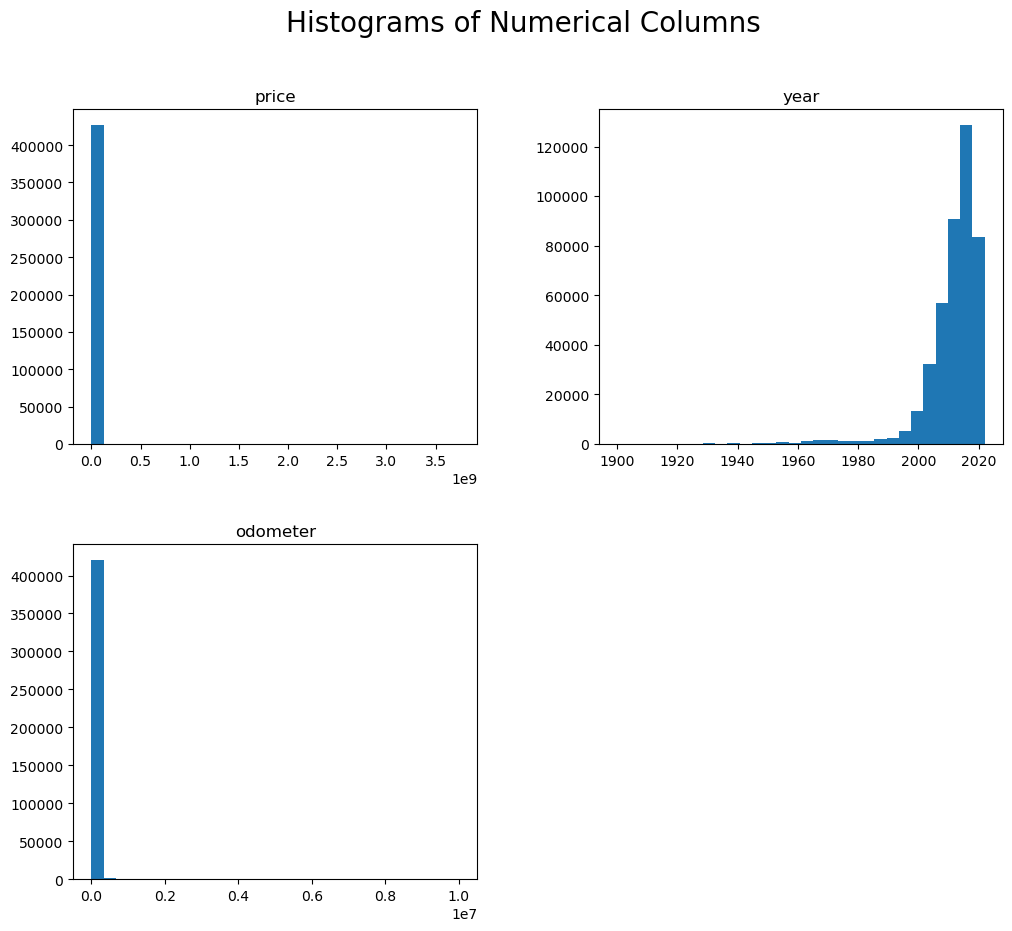

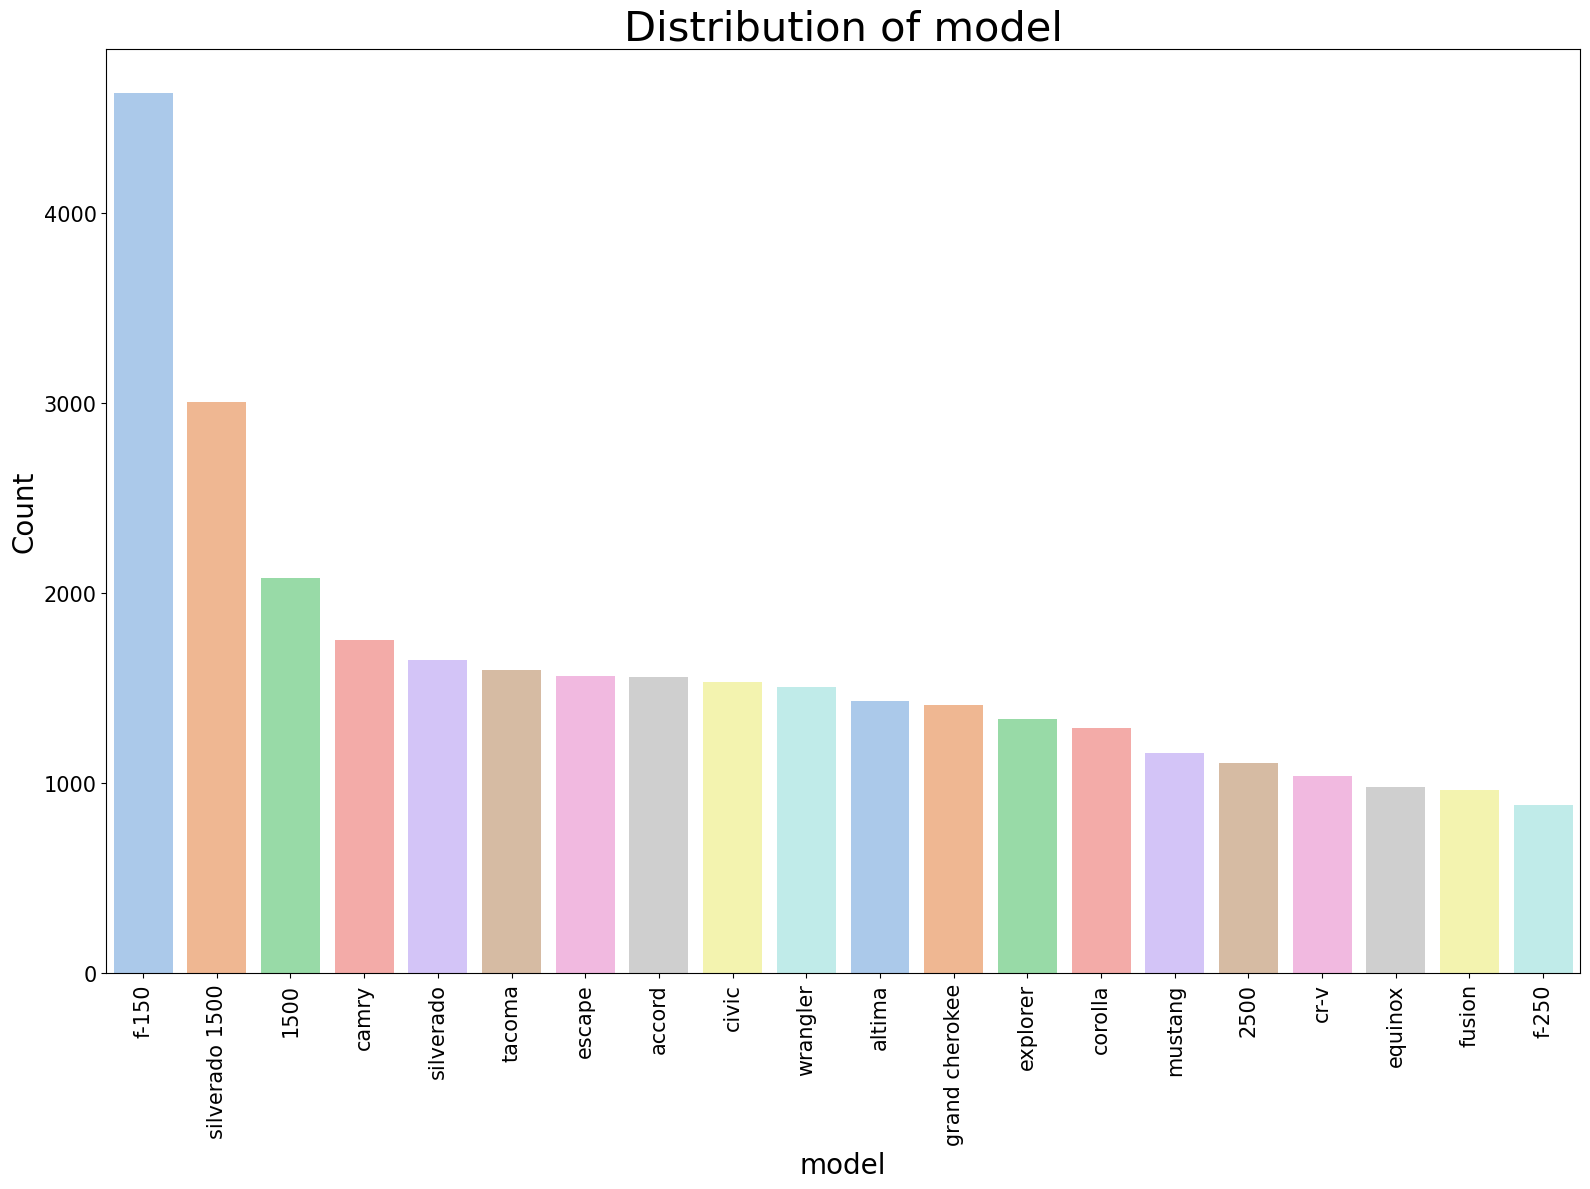

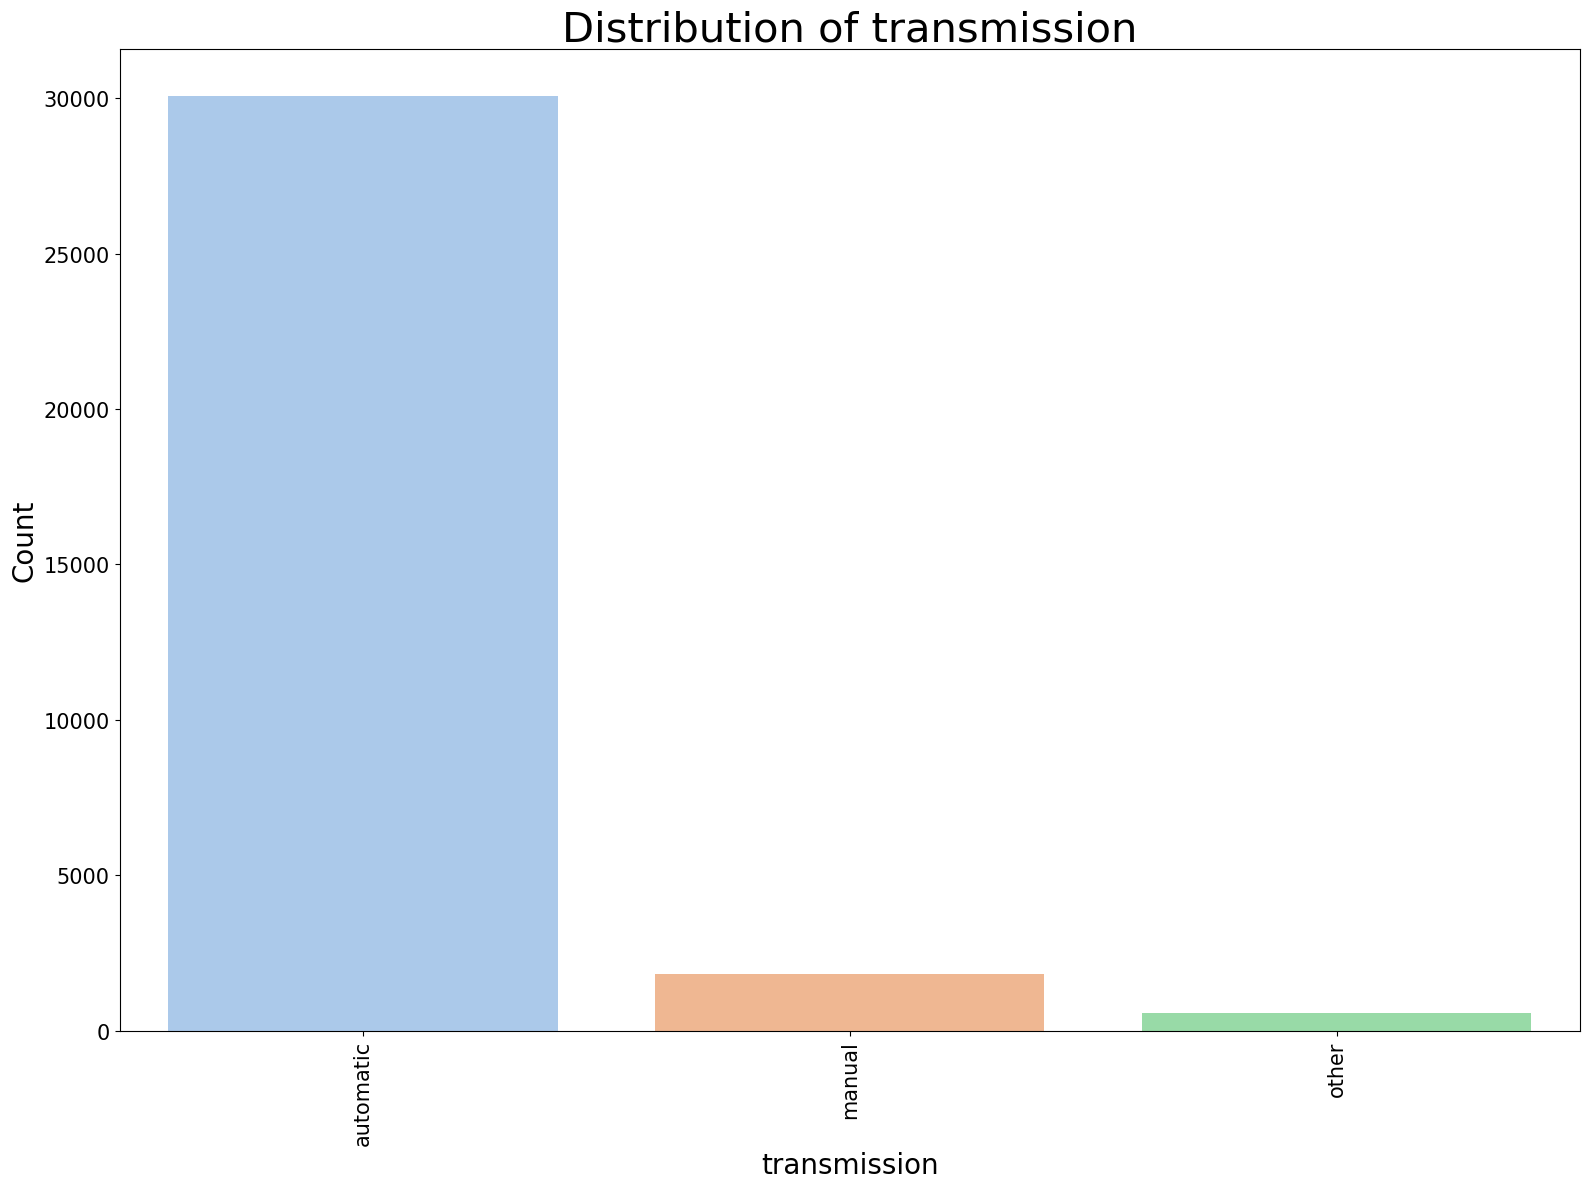

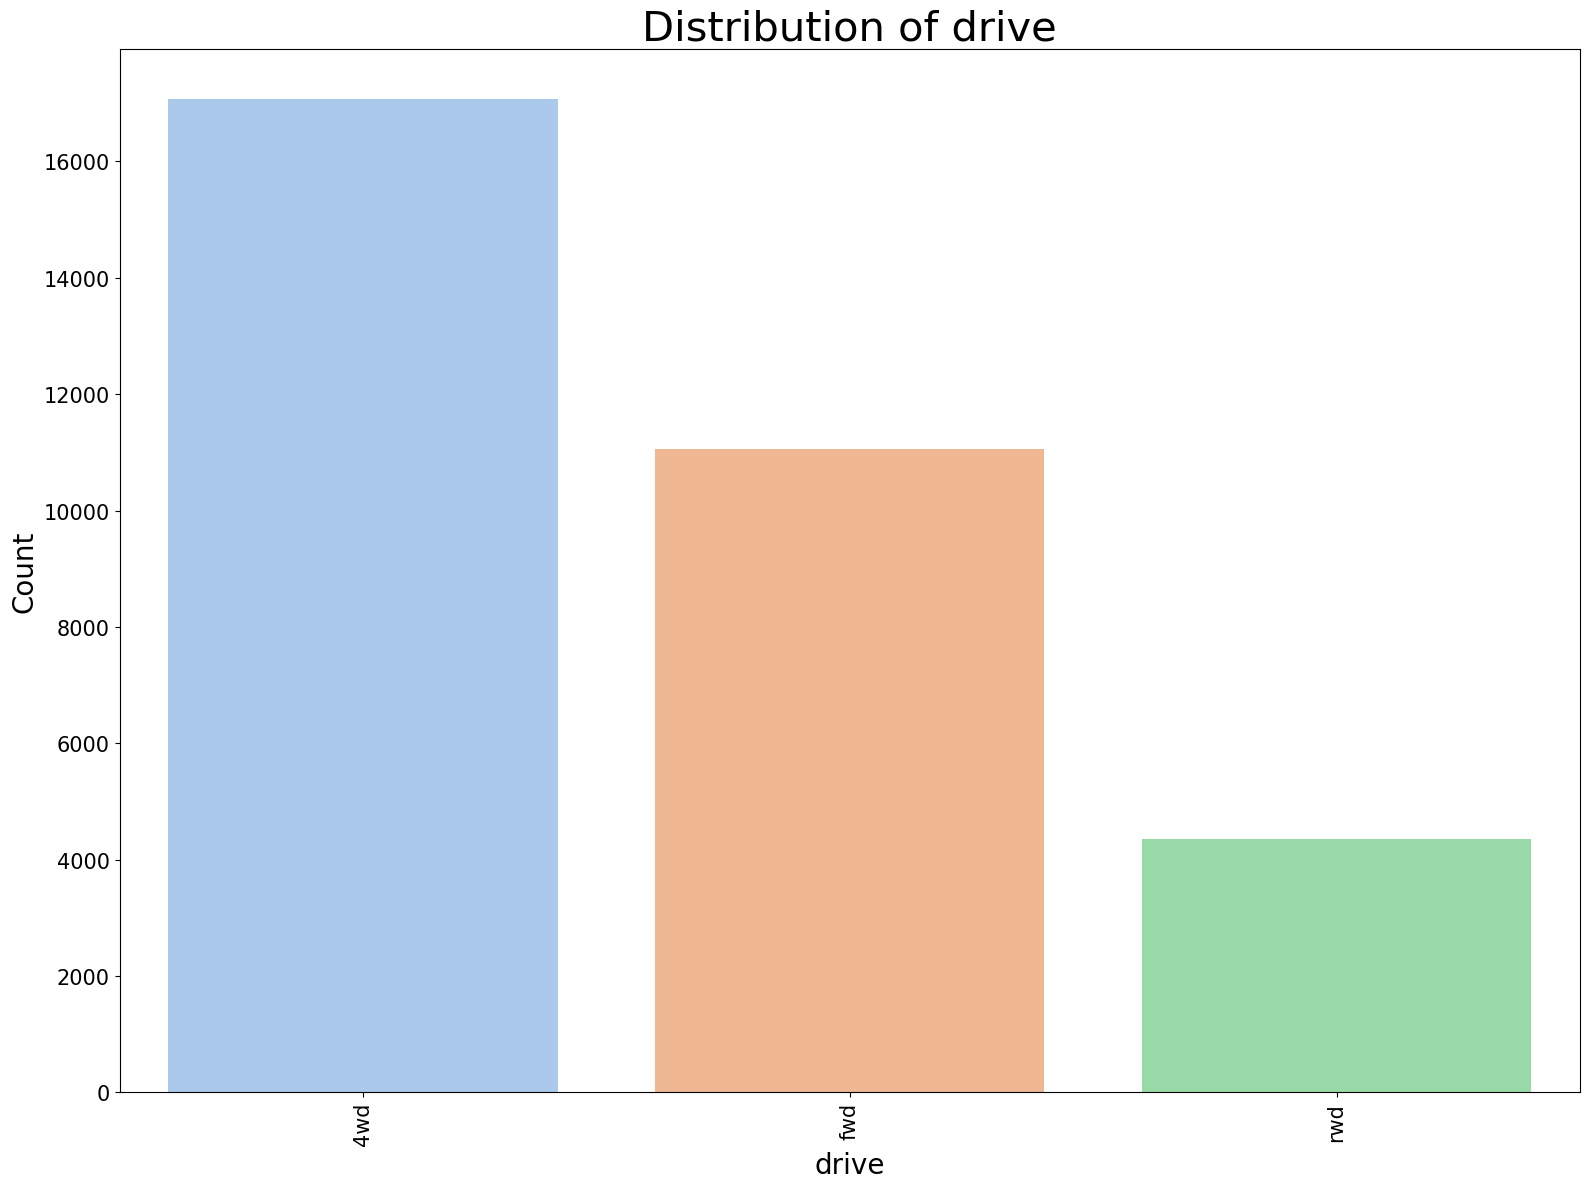

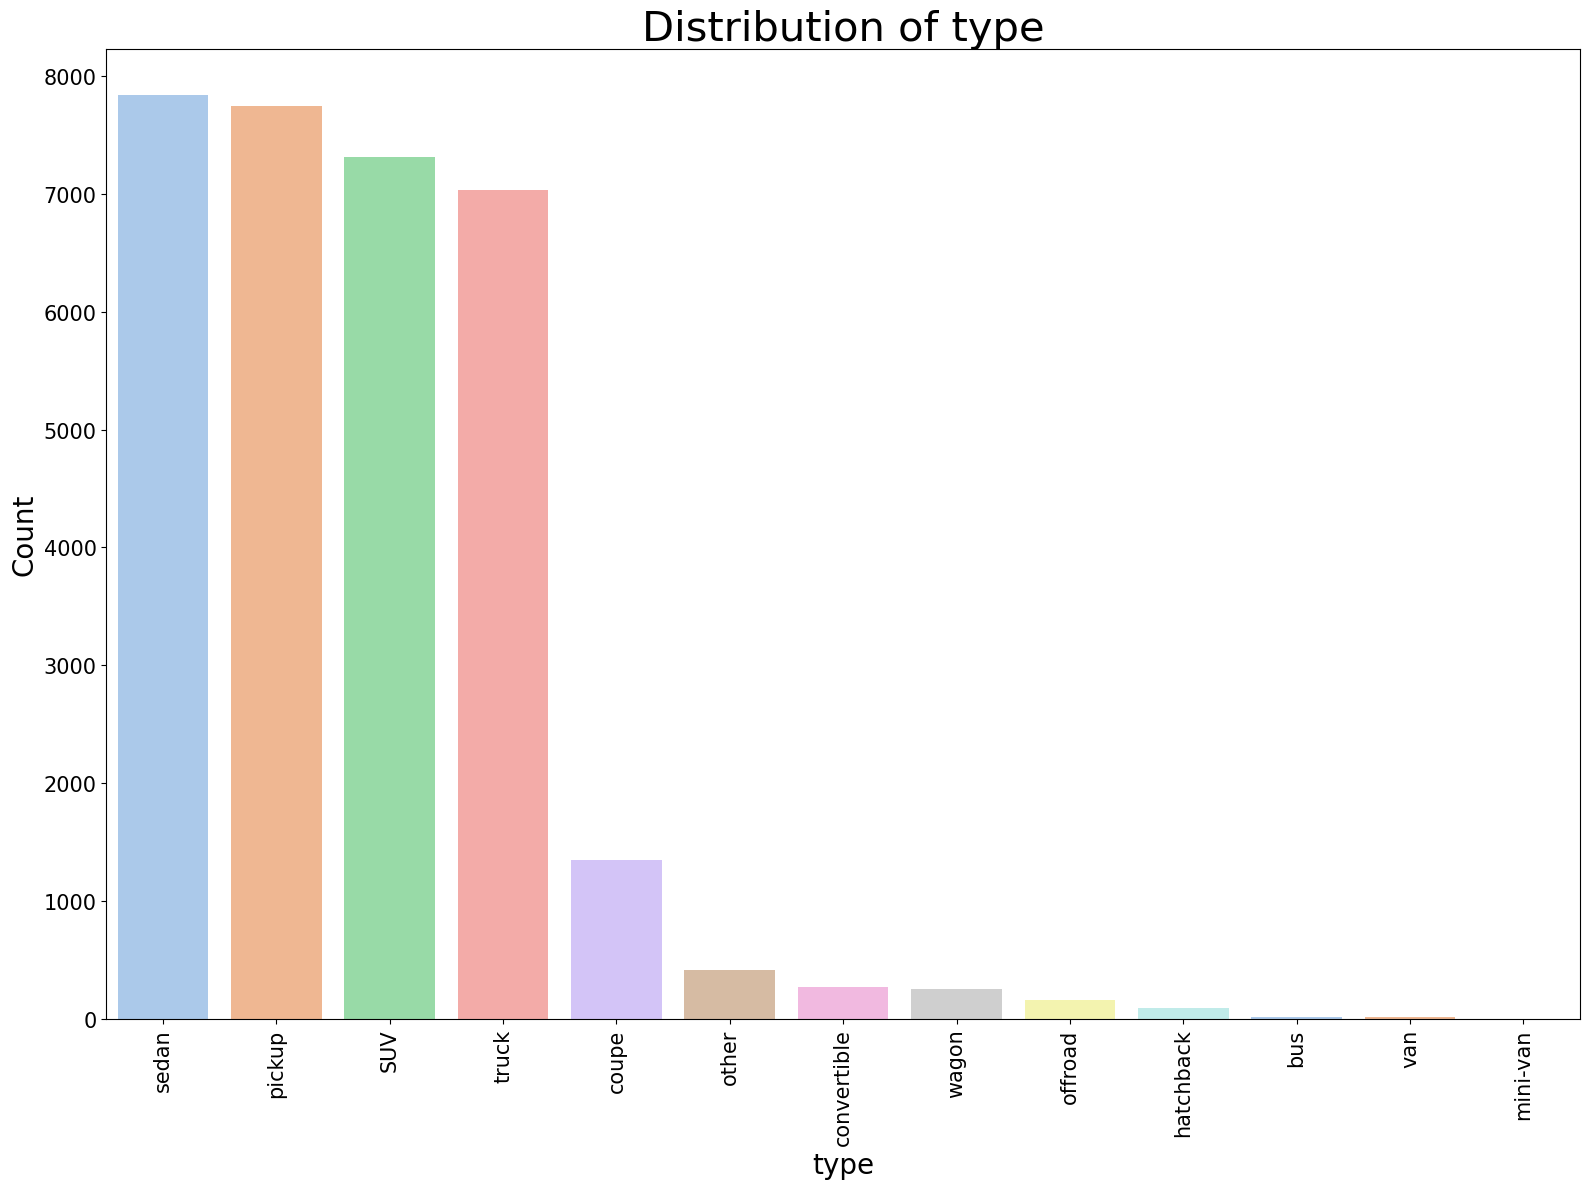

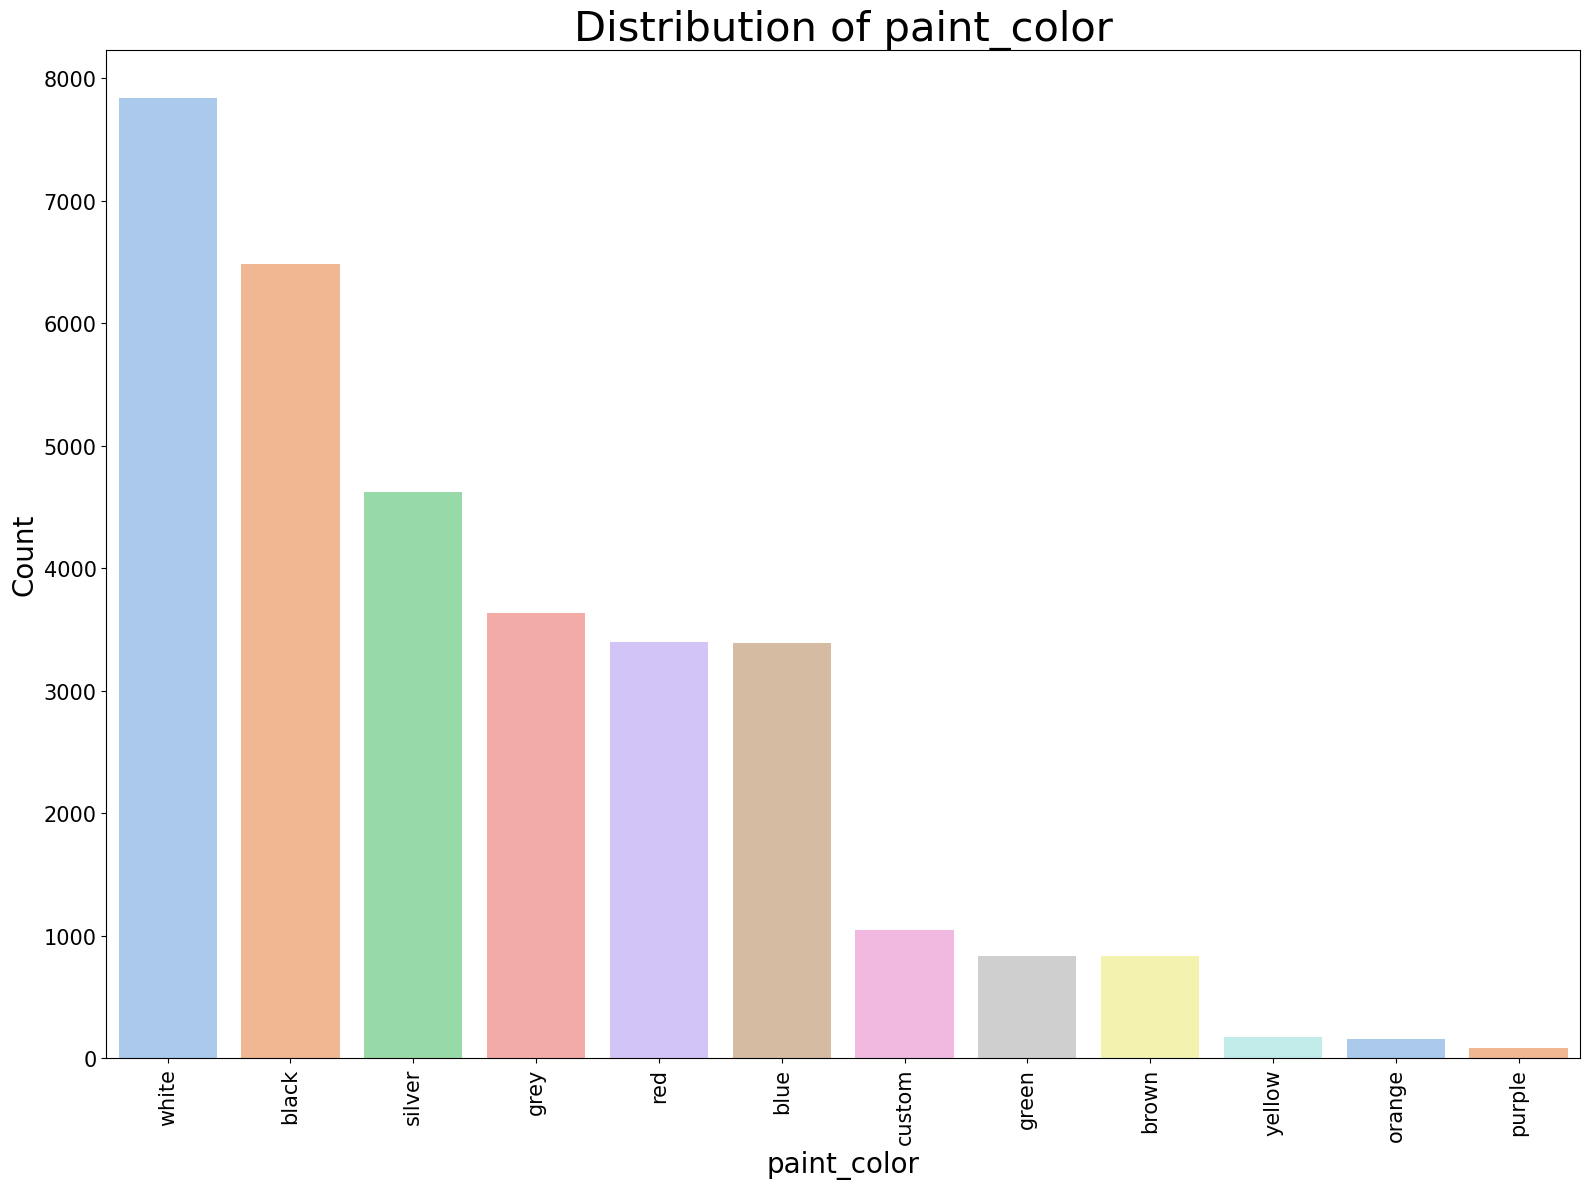

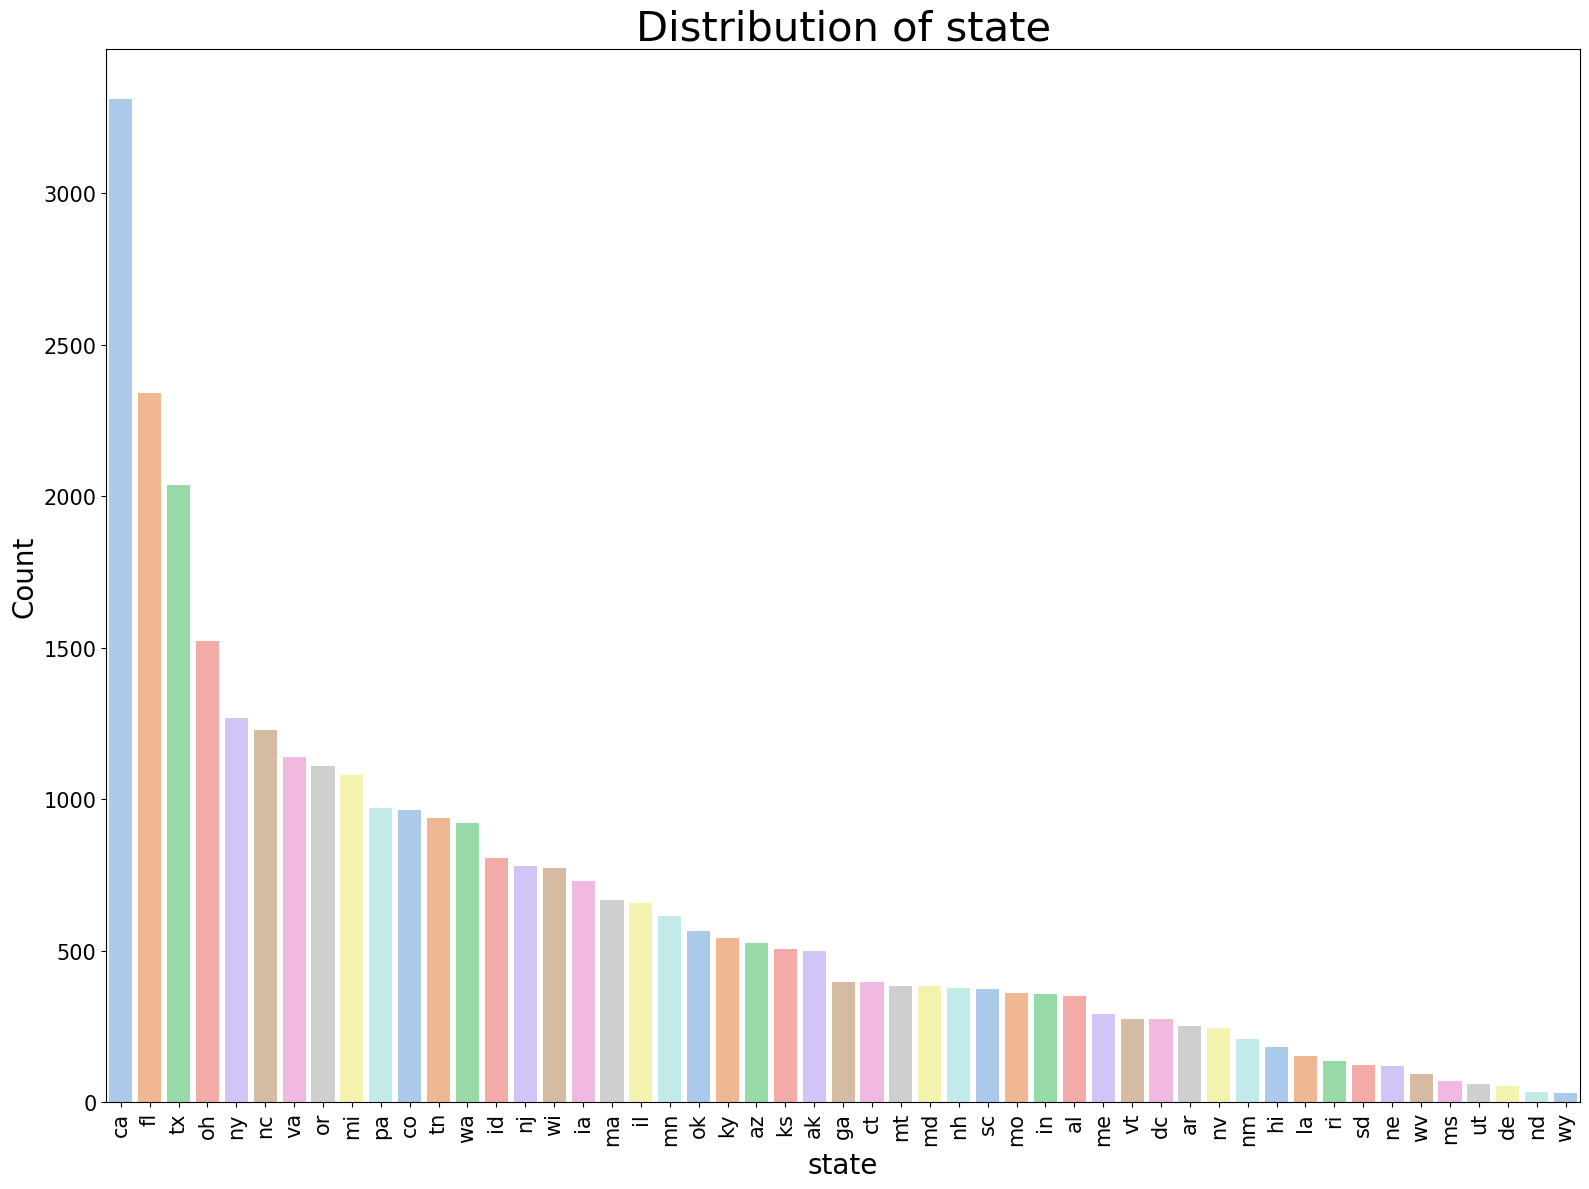

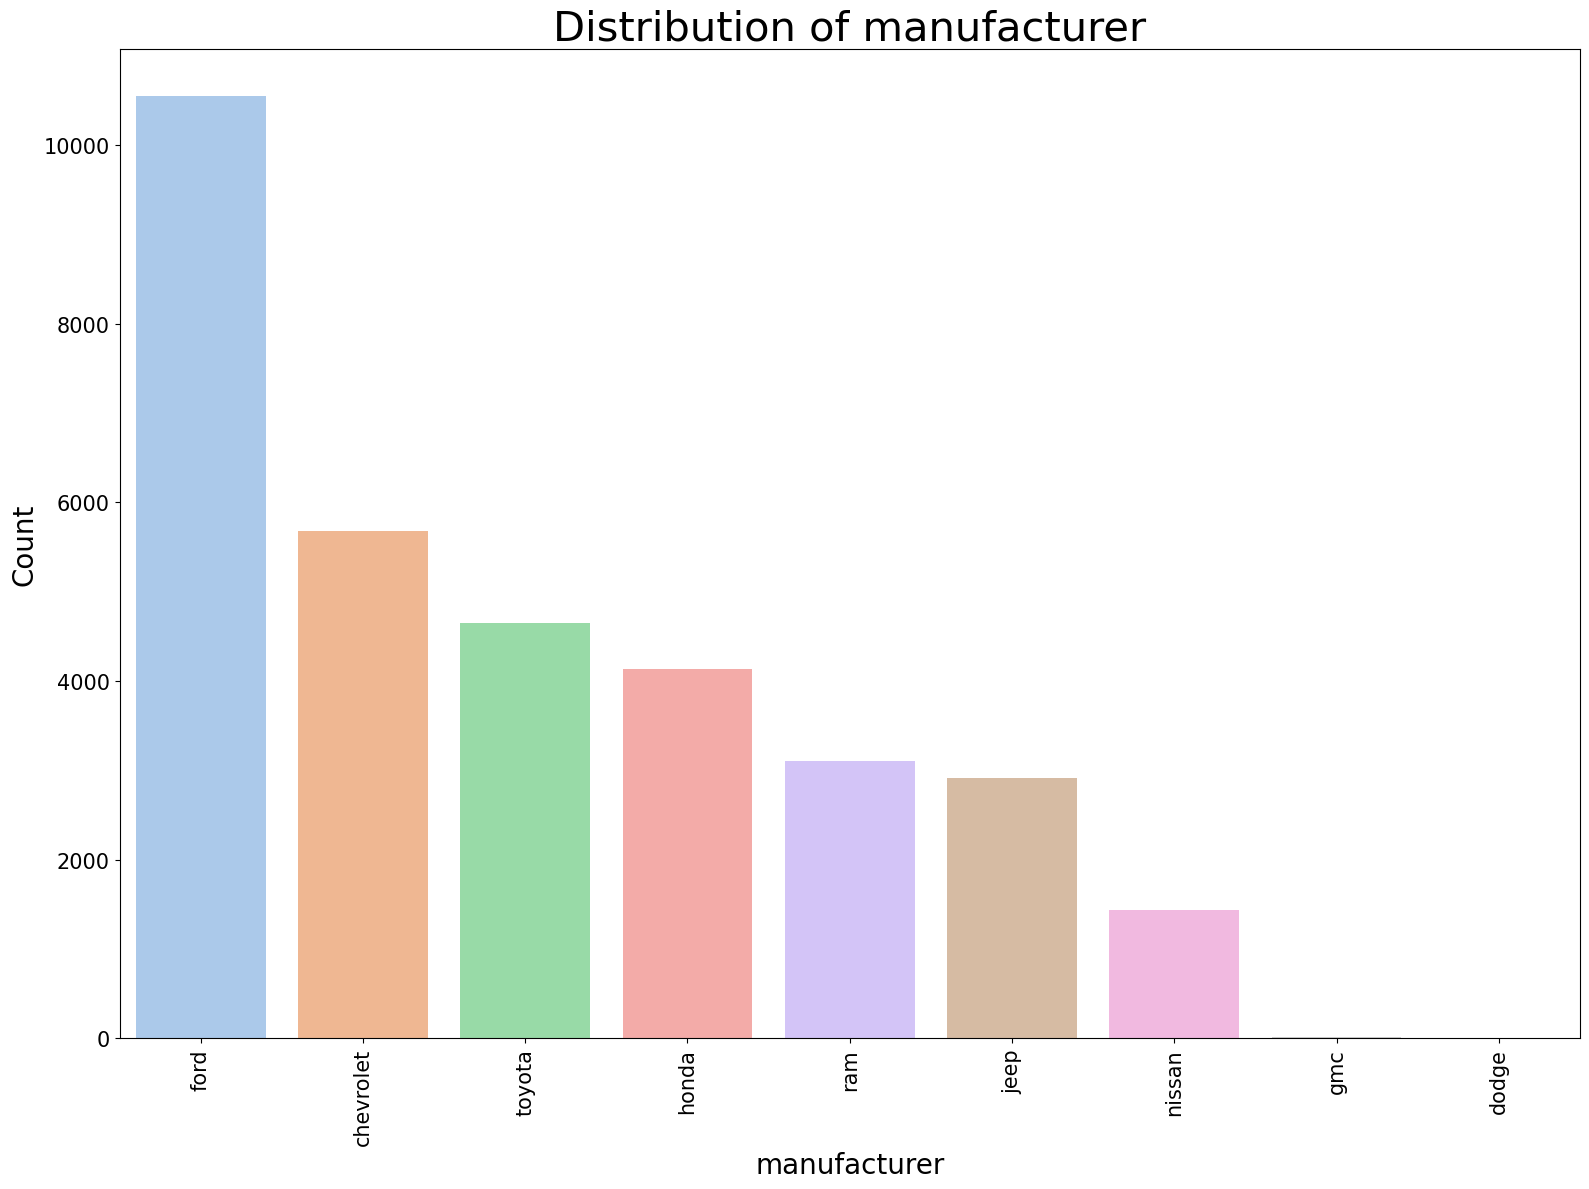

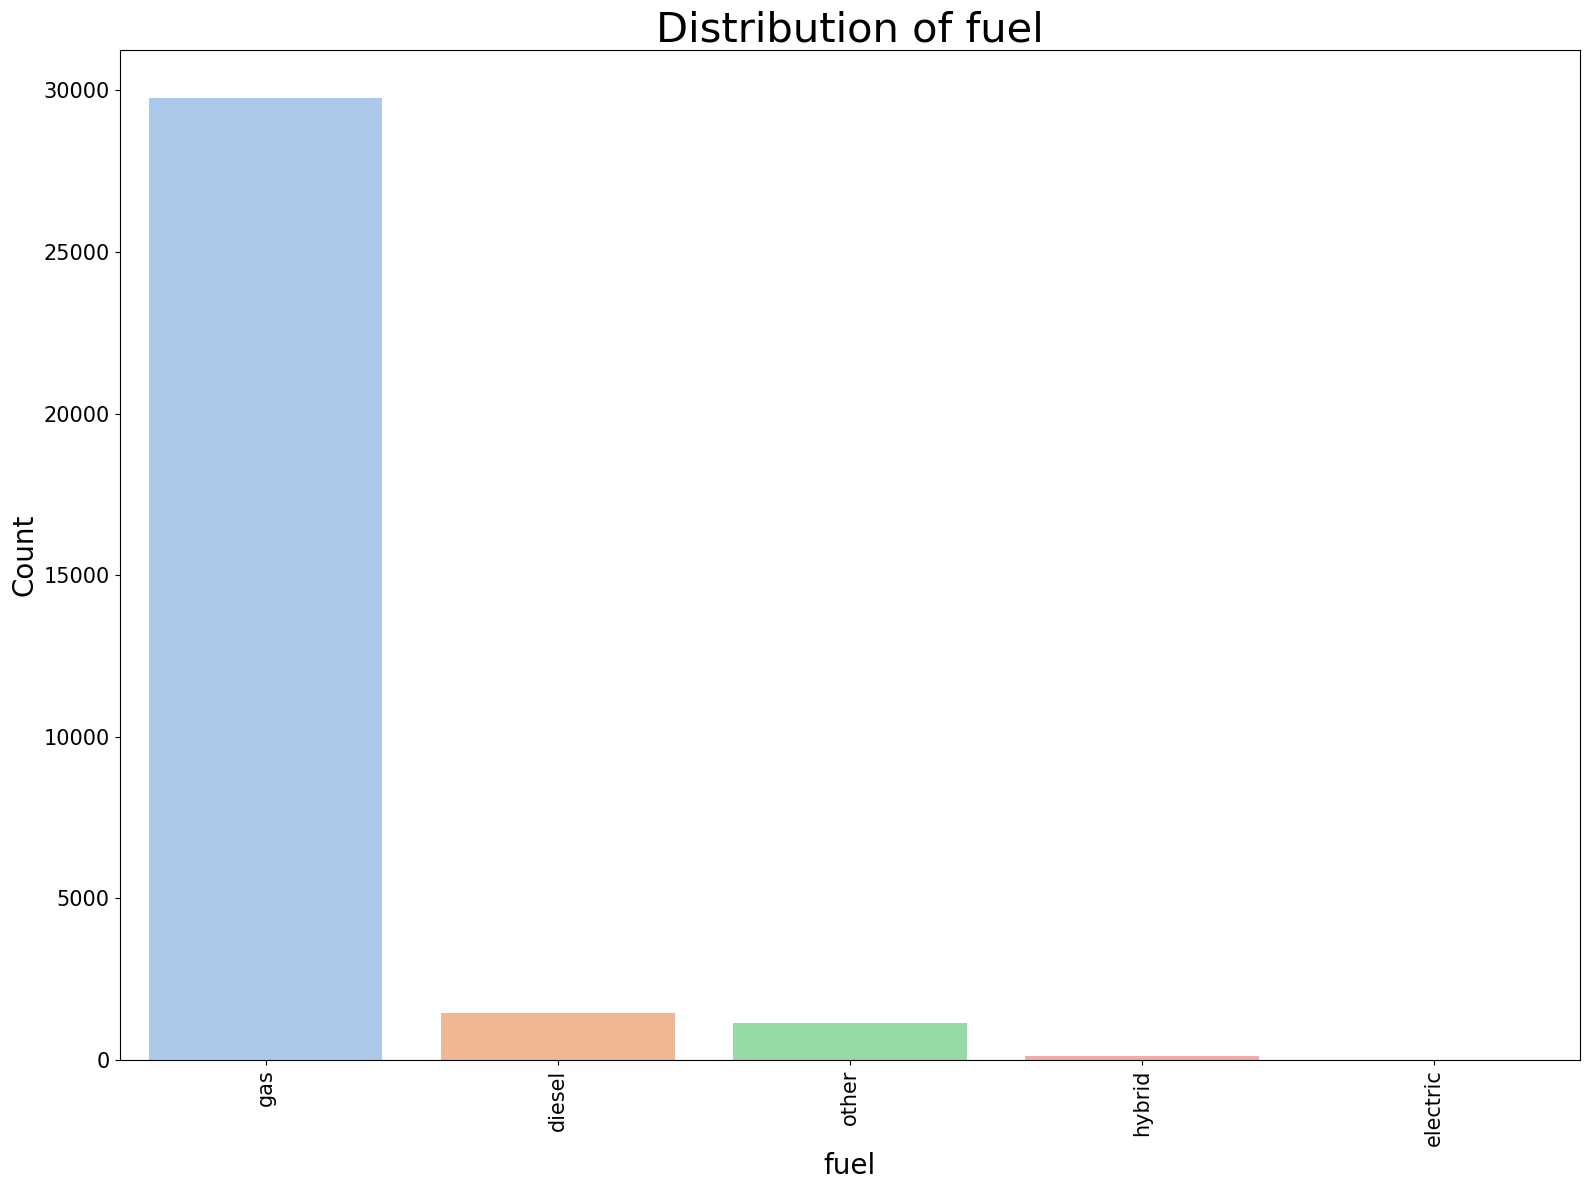

/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15315752429.638672, tolerance: 308571167.34959954
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15544232912.658691, tolerance: 307931739.2383337
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/sella/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15952895661.021484, tolerance: 310201983.9686084
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/sella/opt/anaconda3/lib/python3.11/sit

Best Lasso Params: {'regressor__alpha': 1}
Best Lasso Score: 0.43
Best Ridge Params: {'regressor__alpha': 0.1}
Best Ridge Score: 0.43
Best RandomForest Params: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Best RandomForest Score: 0.77
Linear Regression MSE: 80778691.98
Linear Regression R2: 0.45
Lasso MSE: 80793718.39
Lasso R2: 0.45
Ridge MSE: 80804276.05
Ridge R2: 0.45
RandomForest MSE: 33097729.81
RandomForest R2: 0.77


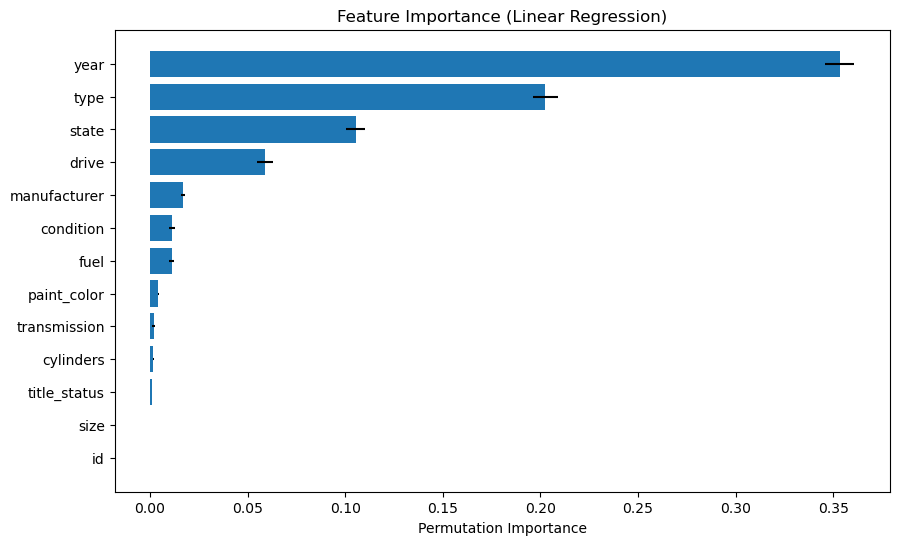

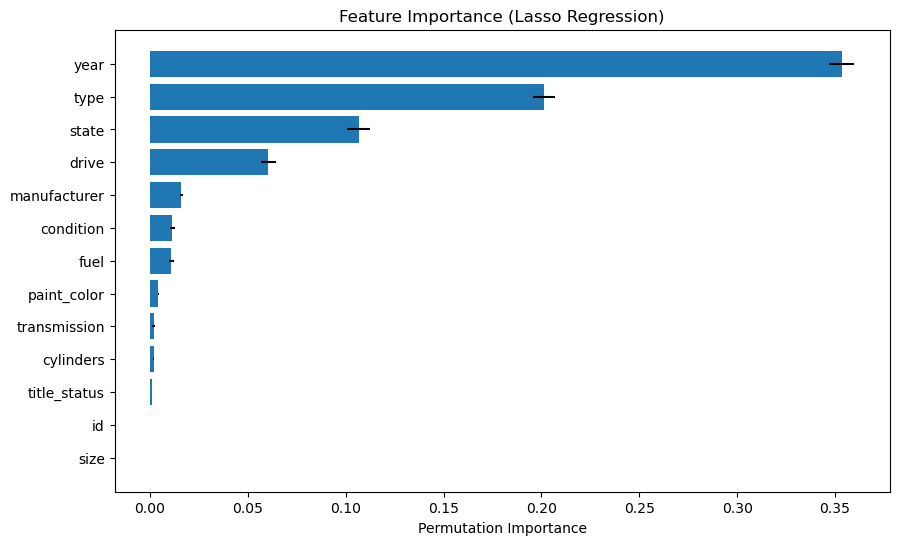

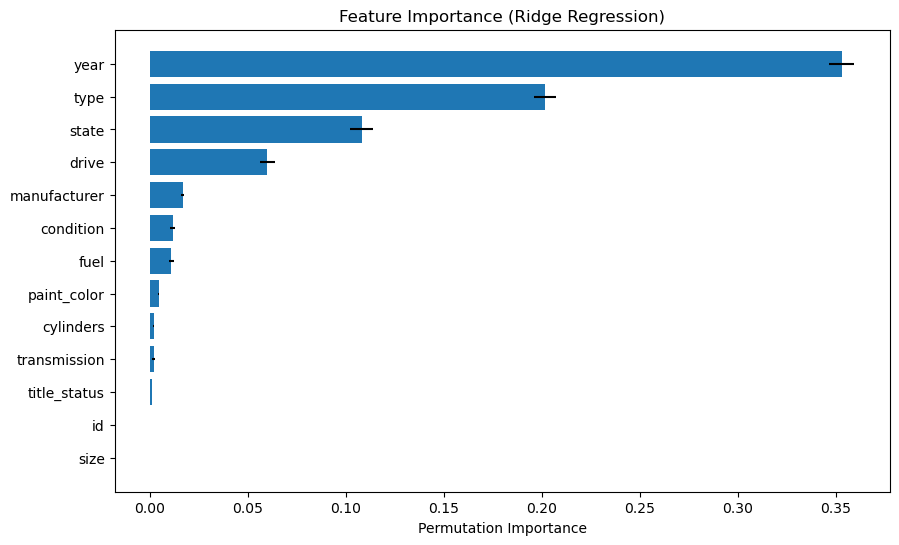

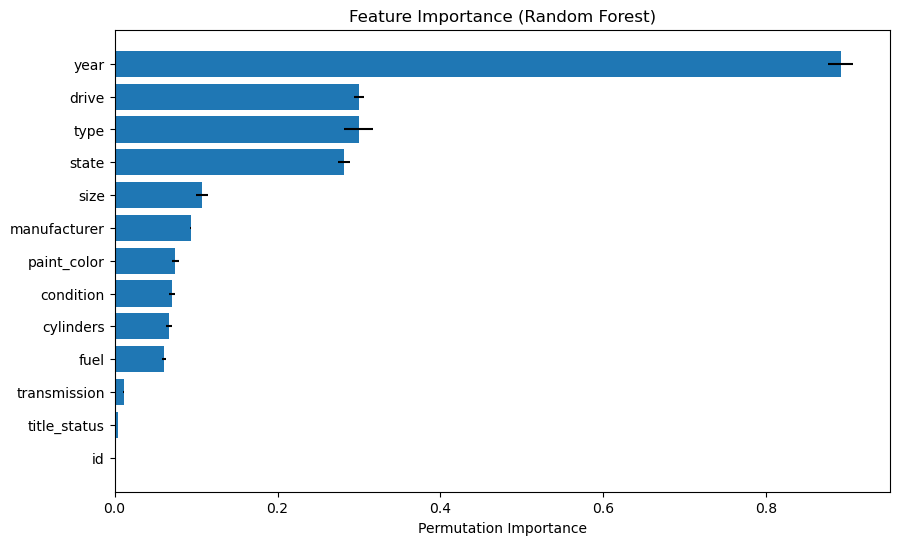

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Initial data check
print(df.info())

# Step 1: Examine Data Distributions for Numerical Columns
numerical_cols = ['price', 'year', 'odometer']
df[numerical_cols].hist(bins=30, figsize=(12, 10), grid=False)
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
plt.show()

# Step 2: Define Categorical Columns (excluding 'model')
categorical_cols = ['transmission', 'drive', 'type', 'paint_color', 'state', 'manufacturer', 'fuel']

# Step 3: Remove Categorical Outliers and NaNs
outlier_threshold = 50
for col in categorical_cols:
    value_counts = df[col].value_counts()
    valid_categories = value_counts[value_counts >= outlier_threshold].index
    df = df[df[col].isin(valid_categories)]

# Step 4: Limit the 'model' column to the top 20 most frequent values
top_20_models = df['model'].value_counts().nlargest(20).index
df = df[df['model'].isin(top_20_models)]

# Step 5: Remove outliers from the 'price' column using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Step 6: Drop NaN values
df = df.dropna(subset=categorical_cols + ['model'])

# Step 7: Plot the Distribution of Categorical Columns
for col in ['model'] + categorical_cols:
    plt.figure(figsize=(16, 12))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Distribution of {col}', fontsize=30)
    plt.xlabel(f'{col}', fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()
    plt.show()

# Step 8: Drop irrelevant columns (VIN, odometer, model, region)
df.drop(columns=['VIN', 'odometer', 'model', 'region'], inplace=True)

# Step 9: Drop duplicates and handle missing values
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Step 10: Convert categorical features to numeric values
df.replace({
    'cylinders': {'5 cylinders': 5, '4 cylinders': 4, '3 cylinders': 3, '8 cylinders': 8, '6 cylinders': 6, '10 cylinders': 10, '12 cylinders': 12},
    'condition': {'excellent': 400, 'good': 300, 'fair': 200, 'salvage': 100, 'like new': 500, 'new': 600},
    'size': {'full-size': 24, 'mid-size': 23, 'sub-compact': 22, 'compact': 21},
    'title_status': {'clean': 1000, 'rebuilt': 500, 'lien': 100, 'salvage': 50, 'missing': 10, 'parts only': 0}
}, inplace=True)

df['cylinders'].replace('other', np.nan, inplace=True)
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
df['cylinders'].fillna(df['cylinders'].median(), inplace=True)

df['condition'] = pd.to_numeric(df['condition'])
df['size'] = pd.to_numeric(df['size'])
df['title_status'] = pd.to_numeric(df['title_status'])

# Step 11: Define categorical and numerical columns
categorical_features = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'state']
numerical_features = ['year', 'condition', 'size', 'cylinders', 'title_status']

# Step 12: Prepare data for modeling
X = df.drop(columns=['price'])
y = df['price']

# Step 12: Train-test split (this was missing before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 13: Create a preprocessor for data transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 14: Set up pipelines for Linear Regression, Lasso, Ridge, and Random Forest

# Linear Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Step 15: Define hyperparameters for GridSearch
lasso_params = {'regressor__alpha': [0.1, 1, 10, 100]}
ridge_params = {'regressor__alpha': [0.1, 1, 10, 100]}
rf_params = {'regressor__n_estimators': [50, 100, 200], 'regressor__max_depth': [None, 10, 20]}

# Step 16: Perform Grid Search for each model

# Linear Regression (no hyperparameters needed)
lr_pipeline.fit(X_train, y_train)

# Lasso Regression
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
print(f"Best Lasso Params: {lasso_grid.best_params_}")
print(f"Best Lasso Score: {lasso_grid.best_score_:.2f}")

# Ridge Regression
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
print(f"Best Ridge Params: {ridge_grid.best_params_}")
print(f"Best Ridge Score: {ridge_grid.best_score_:.2f}")

# Random Forest
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
print(f"Best RandomForest Params: {rf_grid.best_params_}")
print(f"Best RandomForest Score: {rf_grid.best_score_:.2f}")

# Step 17: Evaluate best models on test data

# Linear Regression Evaluation
y_pred_lr = lr_pipeline.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr):.2f}")

# Lasso Evaluation
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"Lasso R2: {r2_score(y_test, y_pred_lasso):.2f}")

# Ridge Evaluation
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
print(f"Ridge MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Ridge R2: {r2_score(y_test, y_pred_ridge):.2f}")

# Random Forest Evaluation
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print(f"RandomForest MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"RandomForest R2: {r2_score(y_test, y_pred_rf):.2f}")

# Step 18: Feature Importance (Linear and RandomForest)

# Linear Regression Feature Importance
lr_result = permutation_importance(lr_pipeline, X_test, y_test, n_repeats=3, random_state=42)
lr_sorted_idx = lr_result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(lr_sorted_idx)), lr_result.importances_mean[lr_sorted_idx], xerr=lr_result.importances_std[lr_sorted_idx], align='center')
plt.yticks(range(len(lr_sorted_idx)), X_test.columns[lr_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Linear Regression)")
plt.show()

# Permutation importance for Lasso
lasso_perm_importance = permutation_importance(best_lasso, X_test, y_test, n_repeats=4, random_state=42)
lasso_sorted_idx = lasso_perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(lasso_sorted_idx)), lasso_perm_importance.importances_mean[lasso_sorted_idx], 
         xerr=lasso_perm_importance.importances_std[lasso_sorted_idx], align='center')
plt.yticks(range(len(lasso_sorted_idx)), X_test.columns[lasso_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Lasso Regression)")
plt.show()

# Permutation importance for Ridge
ridge_perm_importance = permutation_importance(best_ridge, X_test, y_test, n_repeats=4, random_state=42)
ridge_sorted_idx = ridge_perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(ridge_sorted_idx)), ridge_perm_importance.importances_mean[ridge_sorted_idx], 
         xerr=ridge_perm_importance.importances_std[ridge_sorted_idx], align='center')
plt.yticks(range(len(ridge_sorted_idx)), X_test.columns[ridge_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Ridge Regression)")
plt.show()

# Random Forest Feature Importance
rf_result = permutation_importance(best_rf, X_test, y_test, n_repeats=3, random_state=42)
rf_sorted_idx = rf_result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(rf_sorted_idx)), rf_result.importances_mean[rf_sorted_idx], xerr=rf_result.importances_std[rf_sorted_idx], align='center')
plt.yticks(range(len(rf_sorted_idx)), X_test.columns[rf_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

With some modeling completed, it's crucial to reflect on the quality of the models and the insights we've gained regarding used car prices. Here’s my approach:

Model Evaluation: I’ll analyze the performance metrics of each model, particularly focusing on MSE and R-squared values. A model with low MSE and high R-squared will indicate a good fit. I’ll identify which model best captures the underlying trends in the data.

Drivers of Price: By examining the feature importance from models like Random Forest, I can determine the key drivers influencing used car prices. This will help us understand which attributes (e.g., year, condition, fuel type) significantly impact pricing.

Aligning with Business Objectives: I’ll revisit our original business goals to ensure that the insights we’ve derived align with what the client needs. It’s essential to confirm whether our findings can provide actionable recommendations for pricing strategies.

Identify Areas for Improvement: If the model's performance isn’t satisfactory or if certain variables don’t show expected importance, I might need to revisit earlier phases. This could involve further data cleaning, feature engineering, or even gathering more data if necessary.

Reporting Findings: Finally, I’ll distill the key insights into a clear, concise report for the client. This will include actionable insights on pricing strategies based on the identified drivers, as well as any recommendations for future analyses or data collection.

By synthesizing our findings in this way, we can provide valuable insights to our client and make informed decisions about any necessary adjustments to the modeling process.

Results :
Best Lasso Params: {'regressor__alpha': 1}
Best Lasso Score: 0.43
Best Ridge Params: {'regressor__alpha': 0.1}
Best Ridge Score: 0.43
Best RandomForest Params: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Best RandomForest Score: 0.77
Linear Regression MSE: 80778691.98
Linear Regression R2: 0.45
Lasso MSE: 80793718.39
Lasso R2: 0.45
Ridge MSE: 80804276.05
Ridge R2: 0.45
RandomForest MSE: 33530825.06
RandomForest R2: 0.77

In [1]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Year vs Price', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
median_price_per_year = df.groupby('year')['price'].median()

plt.figure(figsize=(10, 6))
plt.plot(median_price_per_year.index, median_price_per_year.values, marker='o')
plt.title('Median Price vs Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Year vs Price', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize the interaction between the top features
sns.pairplot(df, x_vars=['year', 'state', 'type', 'drive'], y_vars='price', height=6, aspect=1, kind='scatter')
plt.suptitle('Top Features vs Price', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_cols = ['price', 'year',  'condition', 'size', 'cylinders']

# Compute the correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

It looks like the key correlations are:

Price vs Year: 0.42
0.42 — This indicates a moderate positive correlation, suggesting that newer vehicles tend to have higher prices.
Price vs Condition: 0.27
0.27 — A weaker positive correlation, which makes sense, as vehicles in better condition tend to be priced higher.
Price vs Size: 0.16
0.16 — A small positive correlation, suggesting that larger vehicles might have slightly higher prices, but size isn't as strong a factor compared to year or condition.
These correlations reflect the relationships between key factors and vehicle price, providing some insights for further analysis or model development.

Based on the model evaluation results, here are the conclusions:

Model Performance Comparison:

The Random Forest model significantly outperforms the other models, with an R-squared value of 0.77 and an MSE of 33,530,825.06. This indicates that it explains approximately 77% of the variance in used car prices, which is a strong indication of its predictive power.
In contrast, both Lasso and Ridge regression models, along with Linear Regression, yield similar performance metrics, with R-squared values around 0.45 and MSE values that are notably higher than those of the Random Forest model. This suggests that they are not capturing the complexities of the data as effectively.
Parameter Tuning:

The best Lasso and Ridge parameters suggest that the regularization strengths were chosen effectively (alpha values of 1 and 0.1, respectively). However, the lack of improvement in model performance indicates that the linear models may not be suitable for this dataset's structure.
The Random Forest's parameters (with max_depth set to None and n_estimators at 100) indicate that it can effectively explore a larger decision space without restrictions, contributing to its superior performance.
Implications for Business Objectives:

Given that the Random Forest model is the best performer, it provides more reliable insights into the factors driving used car prices. The high R-squared value means that we can offer meaningful insights to the client regarding pricing strategies based on the identified drivers.
The relatively low performance of the linear models suggests that there might be nonlinear relationships or interactions among variables that are better captured by ensemble methods like Random Forest.
Next Steps:

I recommend focusing on the Random Forest model for further exploration and validation. We should also analyze the feature importances to understand which attributes most significantly impact price, providing actionable insights to the client.
If necessary, revisit data preprocessing and feature engineering to enhance model performance, particularly in the linear models. This could involve exploring polynomial features or interaction terms.
In summary, the Random Forest model stands out as the most effective for predicting used car prices, and its results can directly inform strategic decisions for pricing based on the key drivers identified.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Report: Insights on Used Car Pricing for Dealers


Introduction
This report summarizes the findings from our analysis of the used car dataset, focusing on the modeling of vehicle prices. Our objective was to provide insights to used car dealers to help fine-tune their inventory strategies.

Modeling Overview
We constructed several regression models with the target variable being the price of the used cars. Here are the key results:

Lasso Regression:

Best Parameters: {'regressor__alpha': 1}
Best Score (R²): 0.43
MSE: 80,793,718.39
Ridge Regression:

Best Parameters: {'regressor__alpha': 0.1}
Best Score (R²): 0.43
MSE: 80,804,276.05
Random Forest Regression:

Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Best Score (R²): 0.77
MSE: 33,530,825.06
Linear Regression:

MSE: 80,778,691.98
R²: 0.45
Key Correlations
We analyzed the correlations between price and key features:

Price vs Year: 0.42

Indicates a moderate positive correlation, suggesting that newer vehicles tend to have higher prices.
Price vs Condition: 0.27

A weaker positive correlation, consistent with the idea that better condition vehicles are priced higher.
Price vs Size: 0.16

A small positive correlation, indicating that while larger vehicles may have slightly higher prices, this factor is less significant compared to year or condition.
These correlations highlight the relationships between various factors and vehicle prices, providing a basis for further analysis or model development.

Conclusion and Recommendations
The Random Forest model demonstrated the highest predictive power, explaining 77% of the variance in used car prices. This model can offer valuable insights into pricing strategies based on the identified drivers.

For used car dealers, focusing on newer models and those in better condition could enhance inventory value. Additionally, understanding the impact of vehicle size can aid in making informed purchasing decisions.

Further analysis can be conducted to refine our insights, including exploring interactions between features or incorporating additional data sources. We encourage the client to consider these findings in adjusting inventory and pricing strategies.

Next Steps
Review the feature importances identified by the Random Forest model to focus on key drivers in pricing.
Consider further data exploration to uncover additional insights that may enhance model performance and business decisions.
